# <center><font size=16, color="#7B241C"> K Nearest Neighbors (KNN) Algorithm

## Introduction

- The **_K_-NN** algorithm is arguably the simplest machine learning Algorithm. To predict a new data point, the algorithm finds the closest data points in the training dataset, hence , its **nearest neighbors**.

- The k-Nearest Neighbors algorithm (k-NN) is a **non-parametric classification** method. 

- K-NN is used for both classification and regression.

- In k-NN classification, the output is a class membership (the point is assigned to the class most common among its k nearest neighbors). 

- In **k-NN regression**, the output is the average of the values of k nearest neighbors.

- **k** is a positive integer. If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

- This algorithm (KNN) relies on distance, so **normalizing** the training data is necessary for improving the accuracy.



[source](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)



In [1]:
from IPython.display import Image

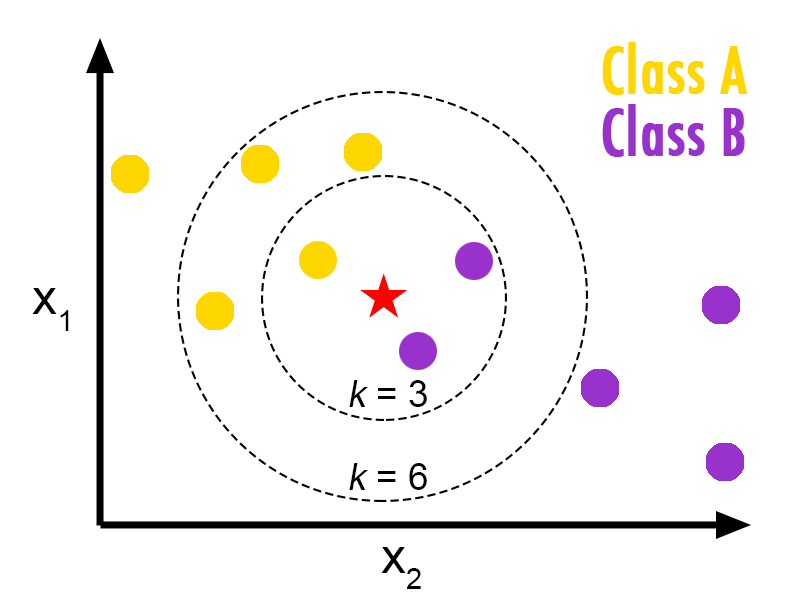

In [2]:
Image('knn_concept.png', retina=True)

### KNN Example:

- Suppose you have two Classes in our training set, A and B. You want to train an algorithm to classify new data points. See the plot above.
 
- After training a KNN algorithm, you want to classify the mew data point **the red star point**. In order to do that, you expand a specific distance away from you feature space until you reach to **k** number of other data points. Thus, 
    - In case of **k=3**, we see that we have two points of class B (purple points) and one point of class A (yellow point). Therefore, we predict the **red star be of class B**.
 
     - In case of **k=6**, we see that we have four points of class A and only two point of class B. Thus we predict the **red star be of class A**.
     

#### Note: 
   - For a binary classification using this KNN algorithm, we must choose an **odd number for k**, to avoid the case of a **tied** distance between two classes.

In [3]:
##==================================================
##             Import Necessary Modules
##==================================================

import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")


In [4]:
def coment(sep = '='):
    print('##' + sep * 50 + '\n' + '##' + '\n' + '##' + sep * 50)

## KNN Exaplained with PLots

  - The next plots aim to classify random binary data. So, to show which class a new data point is assigned to, we use different K numbers (1, 3, 5). 
  
  
  - **Case K=1**: it is considered as the simplest version of **k-NN** algorithm, which only considers exactly one nearest neighbor; in other words, the closest training data point to the point we want to make a prediction for (the stars in the subplot 01). The prediction is then simply the known output for this training point. See (Subplot .01). 
  
  
  - **Case K=3**: now we want to increase the number of neighbors to 3, then we make prediction. From subplot 02 we see that the prediction is make with the majority vote. But, look at the subplot 01 and subplot 02, the prediction for the new data point at the top left was predicted as class 0 with k=1 while it is predicted as class 1 with k=3. 
  
  
  - **Case k=5**: this used only to strengthen the concept of KNN alogorith that we consider an arbitrary number, (k of neighbors). This is where the name of the k-nearest neighbors algorithm comes from.
  
  
### KNN Algorithm Workflow for Binary Classification
  
  - Consider a range of values for **K neighbors**.
  
  - Fit KNN algorithm on training data. 
  
  - Use test set for predictions and use voting to assign a label. Which means, for each test point:
      - Count how many neighbors belong to class 0.
      - Count how many neighbors belong to class 1.
      - Assign the class that is more frequent; or the majority class among the k-nearest neighbors.
          - If Class 0 is dominante (more points of class 0 near to test point), then we assign the test point as **class 0**.
          - If Class 1 is dominante (more points of class 1 near to test point), then we assign the test point as **class 1**.


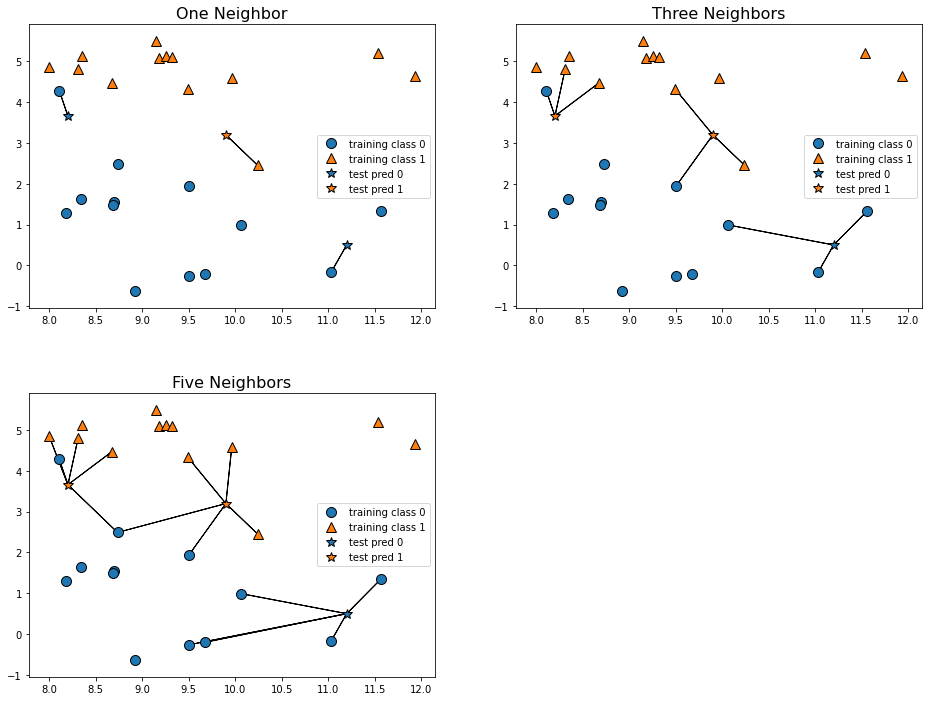

In [5]:
##========================================================
##    Plotting Subplots Illustrating KNN Algorithm concept
##========================================================

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1)
mglearn.plots.plot_knn_classification(n_neighbors=1)
ax1.set_title("One Neighbor",  fontsize=16)


ax2 = fig.add_subplot(2, 2, 2)
mglearn.plots.plot_knn_classification(n_neighbors=3)
ax2.set_title("Three Neighbors",  fontsize=16)


ax3 = fig.add_subplot(2, 2, 3)
mglearn.plots.plot_knn_classification(n_neighbors=5)
ax3.set_title("Five Neighbors", fontsize=16)


plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

## Fitting a KNN Classifier 


### 1. Train/Test Split

   - The basic technique to assess model performance is **train/test** split. By default, the function `train_test_split()` in `sklearn` API will split `75%` of the data into the training set and `25%` into the test set.
   
   - The default setting might work in some scenarios, but in others might not. That being said, **splitting data** suffers from one major problem:
       - If the labels (target variable) have an uneven distribution (one class dominates the other)
       - The test and training sets might not be representative samples of our dataset and could lead us to bild a bias model. 


**What is the solution?**?

### 2. **Stratification: Stratified Sampling**

   - A good technique for sampling more accurately when having imbalanced classes is **stratified sampling**, which is a way of sampling that takes into account the distribution of classes or features in your dataset.
   
#### Example of Strafication:

 -  Soppose we have  a dataset with:
     - `100` samples
     - `80` of which are class `1`.
     - `20` of which are class `0`.
 
 - We want the class distribution in both our training set and our test set to reflect this, so in both our training and test sets, we'd want:
     - `80%` of our sample to be class `1`.
     - `20%` to be class `0`
     
     
 - which means:
 
     - `75%` of our dataset is `75` samples of training set, and We'd want: 
         -  `60` class `1` samples.
         -  `15` class `0` samples.
         
     - `25%` of our dataset is `25` samples of test set, and We'd want: 
         -  `25` class `1` samples.
         -  `5` class `0` samples.
         
In this case the distribution of classes is the same as in the original in the original dataset.

### Stratified sampling with sklearn API

  - **Stratification** is really easy with `scikit learn` using the `train_test_split()` function. This function comes with a `stratify` parameter, and to stratify according to class labels, just pass in your `y` dataset to that parameter. 
  
```python
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( 
    test_size = 0.3, 
    X, y, 
    stratify = y,                                   
    random_state = 102)
```

See this [example](#Example:-Stratification-Example)


### Fitting KNN Classifier with sklearn API Syntax 

```python
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import the tool for splitting the data
from sklearn.model_selection import train_test_split 

# Create arrays for the features and the response variable
y = df['target_name'].values
X = df.drop('target_name', axis=1).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( 
    test_size = 0.3, 
    X, y, 
    stratify = y,                                    # <-- splitting needs stratification 
    random_state = 102)

# Instantiate the KNN classifier with a specific number k (for example 3)
knn_clf = KNeighborsClassifier(n_neighbors  = 3)

# Fit the classifier to the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
preds = knn_clf.predict(X_test)

# Print the prdicted labels
print("Predicted labels: {}".format(preds))

# Check the accuracy of the classifier using `score()` method
acc = knn_clf.score(X_test, y_test)

# Print the accuracy
print("The model's accuracy is: {}".format(acc))
```

In [6]:
# Import the tool for splitting the data
from sklearn.model_selection import train_test_split 

# ===================================================
# Create a random data
# """
#   install mglearn if you haven't already done that
#  use: !pip install mglearn  
#"""
# ===================================================

X, y = mglearn.datasets.make_forge()

# Split the randomly generated data
# =================================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42)

# Import KNN classifier
# =====================
from sklearn.neighbors import KNeighborsClassifier 

# Create a knn classifier Object with k=3
# --------------------------------------
clf = KNeighborsClassifier(n_neighbors=3)

# Fit knn classifier
# -------------------
clf.fit(X_train, y_train)

# Generate Predictions 
# ---------------------
preds = clf.predict(X_test)

# Print the test prediction
# -------------------------

print("Test set predictions: {}".format(preds))

Test set predictions: [1 1 1 1 0 1 0]


In [7]:
# Score the knn classifier 
acc = clf.score(X_test, y_test)

# Print the accuracy
print("The model Accuracy is".center(70))
print("="*70)
print("Test set accuracy: {:.2f}".format(acc))
print("-"*70)


                        The model Accuracy is                         
Test set accuracy: 0.86
----------------------------------------------------------------------


___

## KNN Model Complexity

### Model complexity

 - Recall from our previous lectures that we discussed the concept of **overfitting**, **underfitting** and **hyperparameter**, and we also discussed the **decision boundary** in the logistic regression lecture. The same concepts apply in the **KNN** algorithm.
 
 
 - **K in KNN** is a **hyperparameter** and needs to be specified by us. In other words, we a give a range of values for **k** then assess the **knn model**. To illustrate this concept more clearly, we visualize a decision boundary for several, increasing values of K in a KNN model. We notice that:
     - With small value of **K** the decision boundary is wiggly (curvy). (**Subplot 01*: k=1*)
     - As **K increases**, the decision boundary gets smoother and less curvy. (**Subplot 03*: k=9*)
     - A **small K value** means the knn model is complex, which means less sensitive to the noisy data points (**Overfitting**). (**Subplot 01*: k=1*)
     - A **large K value** means a less **complex knn model**, which means more sensitive to noisy data points (**Underfitting**). (**Subplot 03*: k=9*)


### Final Thoughts about K

   - Large **K** value makes the model simpler, and the model will perform less well on **both test and training sets**. This scenario is called **underfitting**.
   
   
   - Low **K** value makes the model more complex, and the model will perform well on the training set but perform badly on test set, or it does not generalize well to unseen data. This called **overfitting**.
   
   
   - Finding a value **k** that makes the model neither overfitts nor underfits is the point of our interest. (**Subplot 02: k=3**)

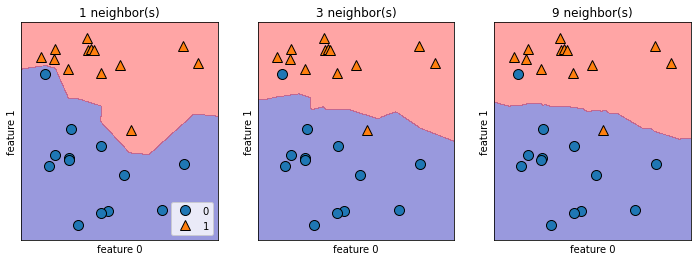

In [8]:
# Generate random data
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax = ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend()

# (source: Andreas Müller & Sarah Guido, Introduction to Machine Learning with Python)

## Choosing Best K in K Nearest Neighbors

  - As we discussed before, finding the optimal **k** value for KNN classifier is our goal. In order to clarify that, we will use:
      1. Randomly generated data.
      2. Giving a range of values for K
      3. Fitting KNN classifier for each K value.
      4. Plot the model performance on both training and test sets.

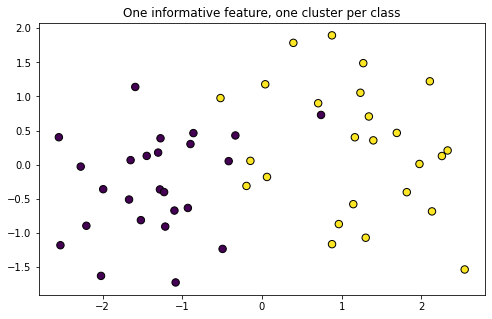

In [9]:
##======================================================
##          Choosing the optimal K 
##          ----------------------
##          import the tools for generating random data
##======================================================

from sklearn.datasets import make_classification

plt.figure(figsize=(8, 5))


plt.title("One informative feature, one cluster per class", fontsize="large")

# Generate random data
# ---------------------
X1, Y1 = make_classification( 
    n_samples=50,
    n_features=2, n_redundant=0, n_informative=1, 
    n_clusters_per_class=1,
    random_state=0)
# Plot the randomly generated data
# ---------------------------------
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=55, edgecolor="k")
plt.show()

## Setting K=1 (Overfitting Case)

  - First, we set k=1, very low number.
  - Fit a KNN classifier
  - Plot the decision boundary

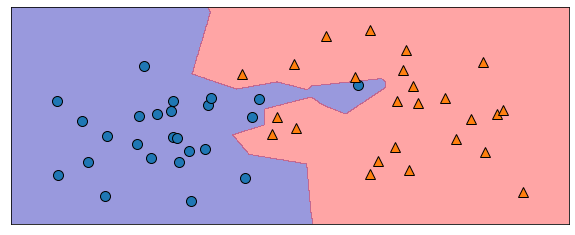

In [10]:
# Fit the previously generated data and plot the decision boundary
# ----------------------------------------------------------------

clf = KNeighborsClassifier(n_neighbors=1).fit(X1, Y1)

plt.figure(figsize=(10,4))

mglearn.plots.plot_2d_separator(clf, X1, fill=True, eps=0.5, alpha=.4) 
mglearn.discrete_scatter(X1[:, 0], X1[:, 1], Y1)
plt.show()

## Setting K= 20 (Underfitting Case)

  - Setting a larger k value. 
  - Fitting KNN Classifier
  - Plotting the decision boundary

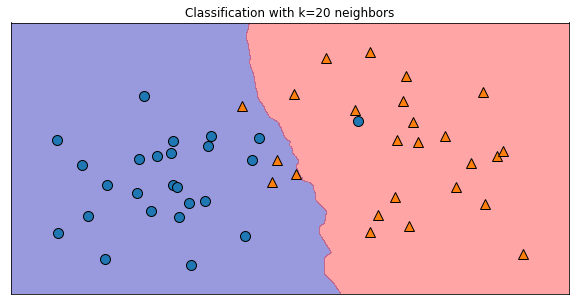

In [11]:
# Fit the previously generated data and plot the decision boundary
# ----------------------------------------------------------------
clf = KNeighborsClassifier(n_neighbors=20).fit(X1, Y1)
 
plt.figure(figsize=(10,5))

mglearn.plots.plot_2d_separator(clf, X1,
                                fill=True, 
                                eps=0.5,
                                alpha=.4) 

mglearn.discrete_scatter(X1[:, 0], X1[:, 1], Y1)

plt.title("Classification with k=20 neighbors")
plt.show()

## What is the best K

  - In this section, we will attempt to find the optimal K for a KNN classifier. To do that we will follow the next steps:
  
    1. Generate random data using `make_classification()` function
    2. Split the data 
    3. Setting a range values for k
    4. Loop over the K values and fit a knn classifier for each k value
    5. plot the accuracy for both training and test set.

In [12]:
##==================================================
##     Import then split the breast cance data set
##==================================================
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

# Generate random data (250 observations)
# ---------------------------------------
X1, Y1 = make_classification( 
    n_samples=250,
    n_features=2, n_redundant=0, n_informative=1, 
    n_clusters_per_class=1,
    random_state=0
)

# Split the data into training and test set
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                    X1, Y1, 
                                    stratify =Y1, 
                                    random_state=0)

# Create empty lists for storing the accuracies
training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 20 
neighbors_space = range(1, 20)

# Loop over the k neighobors_space (1, 20)
for n_neighbors in neighbors_space:
    
    # build the KNN classifier model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train) 
    
    # Record the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) 
    
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))

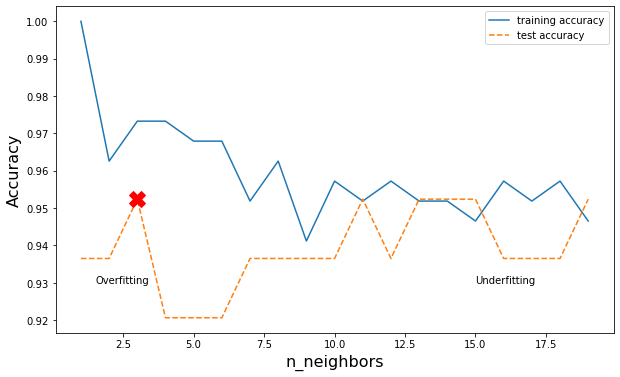

In [13]:
# Plot the results
# ---------------
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(neighbors_space, training_accuracy, label="training accuracy")
ax.plot(neighbors_space, test_accuracy, label="test accuracy", 
          linestyle="dashed")

## Add the Best Test Accuracy
ax.plot(np.argmax(test_accuracy)+1, test_accuracy[np.argmax(test_accuracy)],
         marker="X", markersize = 16, c="red")
ax.set_ylabel("Accuracy", fontsize=16)
ax.set_xlabel("n_neighbors", fontsize = 16)
ax.annotate('Overfitting', xy=(1.5, 0.93))
ax.annotate('Underfitting', xy=(15, 0.93))
ax.legend()
plt.show()

# <center><font size=6,  color="#7B241C"> K Nearest Neighbors (KNN) in Practice

## Breast Cancer Classification Example with KNN

In [14]:
##==================================================
##     Import then split the breast cance data set
##==================================================

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
                                    cancer.data, cancer.target, 
                                    stratify =cancer.target, 
                                    random_state=66)

In [15]:
# Create empty list for storing the accuracy on both train and test sets

training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 20 
neighbors_space = range(1, 20)

# Loop over the k neighobors_space (1, 20)
for n_neighbors in neighbors_space:
    
# build the KNN classifier model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train) 
    
    # Record the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) 
    
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))

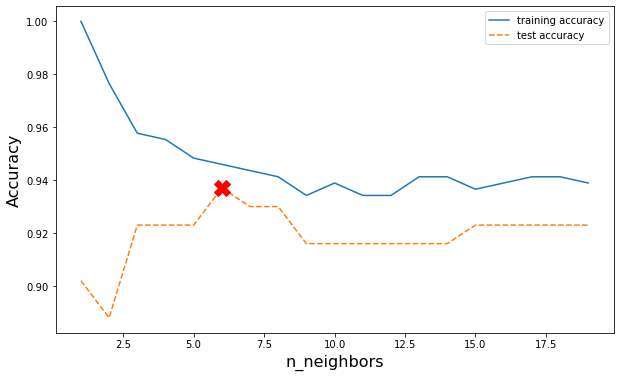

In [16]:
# record training set accuracy training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy test_accuracy.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(neighbors_space, training_accuracy, label="training accuracy")
plt.plot(neighbors_space, test_accuracy, label="test accuracy", 
          linestyle="dashed")

## Add the Best Test Accuracy
plt.plot(np.argmax(test_accuracy)+1, test_accuracy[np.argmax(test_accuracy)],
         marker="X", markersize = 16, c="red")
plt.ylabel("Accuracy", fontsize=16)
plt.xlabel("n_neighbors", fontsize = 16)
plt.legend()
plt.show()

### Example: Stratification Example

In [17]:
# Create the class labels (0,1)
dat = np.repeat([0, 1], [20, 80])

# Shuffle the data
np.random.shuffle(dat)

# Create a random feature
x =  np.random.normal(67, 8.7, size=100 )

# Create a data frame
df = pd.DataFrame({'y': dat, 'x':x})

# print the head of data frame
df.head()

,y,x
0,1,72.183601
1,1,55.945120
2,1,86.109819
3,1,58.954441
4,1,73.539724


In [18]:
# Count the values of lables
df['y'].value_counts()

1    80
0    20
Name: y, dtype: int64

In [19]:
# Split the data using stratification 
X_train, X_test, y_train, y_test = train_test_split(
                                    df['x'], df['y'], 
                                    stratify = df['y'], 
                                    random_state=0)

In [20]:
# Count the values in both training and test sets
y_train.value_counts()

1    60
0    15
Name: y, dtype: int64

In [21]:
y_test.value_counts()

1    20
0     5
Name: y, dtype: int64